In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# Load Netflix dataset
df = pd.read_csv("netflix_titles_2021.csv")

# Display basic information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [25]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [31]:
# Fill missing values in 'country' with 'Not Specified'
df["country"].fillna("Not Specified")

0       United States
1        South Africa
2       Not Specified
3       Not Specified
4               India
            ...      
8802    United States
8803    Not Specified
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [35]:
# Fill missing values in 'date_added' with 'Unknown'
df["date_added"].fillna("Unknown")


0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [37]:
# Fill missing values in 'rating' with 'Not Rated'
df["rating"].fillna("Not Rated")

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

C:\Users\lenovo\AppData\Local\Temp\ipykernel_748\758184531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["type"], palette="pastel")


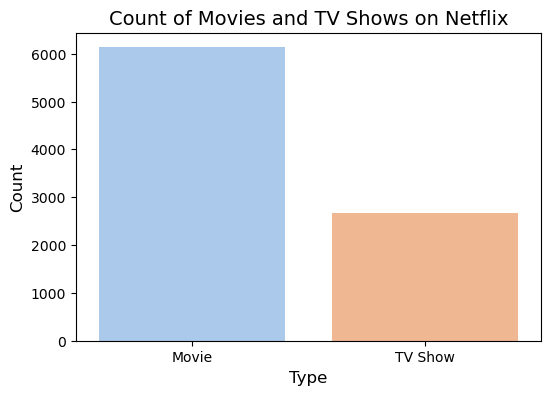

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["type"], palette="pastel")
plt.title("Count of Movies and TV Shows on Netflix", fontsize=14)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


In [63]:
 #Encoding Categorical Variables (For Machine Learning Use)

# Convert categorical variables into numerical format using Label Encoding
from sklearn.preprocessing import LabelEncoder

# Encoding 'type' column (Movie = 0, TV Show = 1)
df["type_encoded"] = LabelEncoder().fit_transform(df["type"])

# Encoding 'rating' column
df["rating_encoded"] = LabelEncoder().fit_transform(df["rating"])

# Display the modified dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,type_encoded,rating_encoded
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,0,7
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,1,11
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,1,11
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Not Specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,1,11
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,1,11


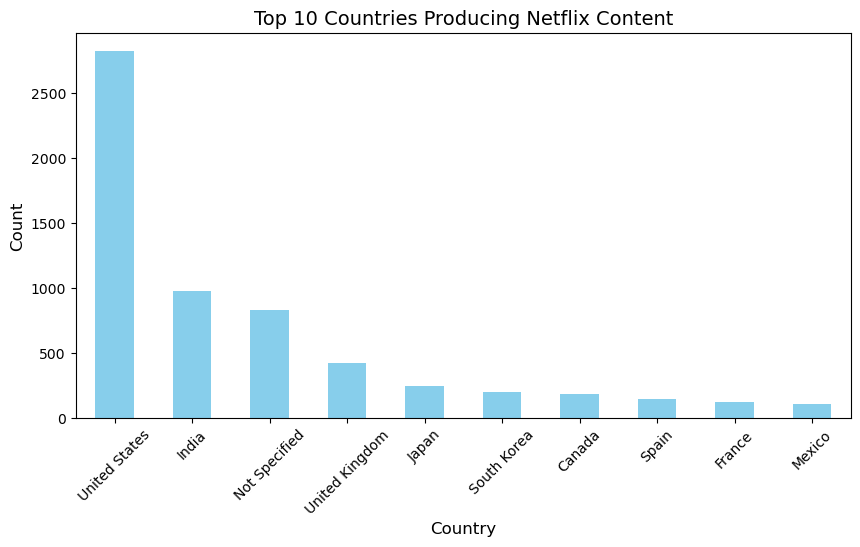

In [43]:
#3. Data Visualization
(a) Count of Movies vs TV Shows

#(b) Top 10 Countries Producing Netflix Content

plt.figure(figsize=(10, 5))
df["country"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Countries Producing Netflix Content", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

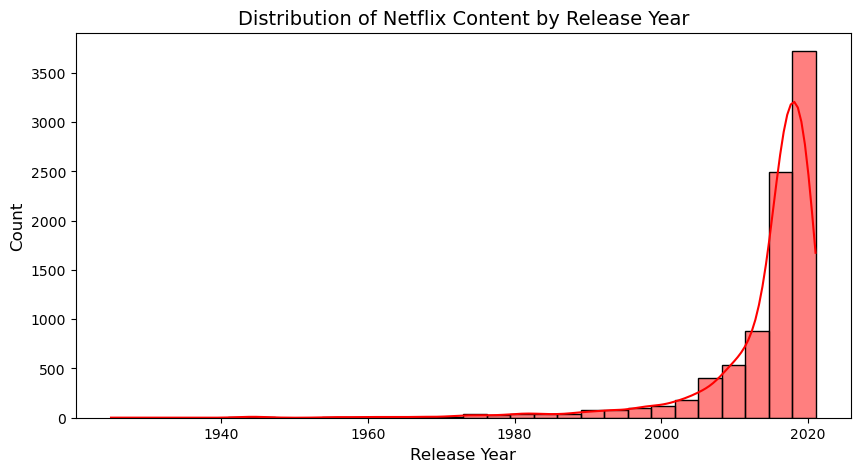

In [45]:
#(c) Distribution of Release Years

plt.figure(figsize=(10, 5))
sns.histplot(df["release_year"], bins=30, kde=True, color="red")
plt.title("Distribution of Netflix Content by Release Year", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_748\56406889.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_df["Count"], y=genre_df["Genre"], palette="coolwarm")


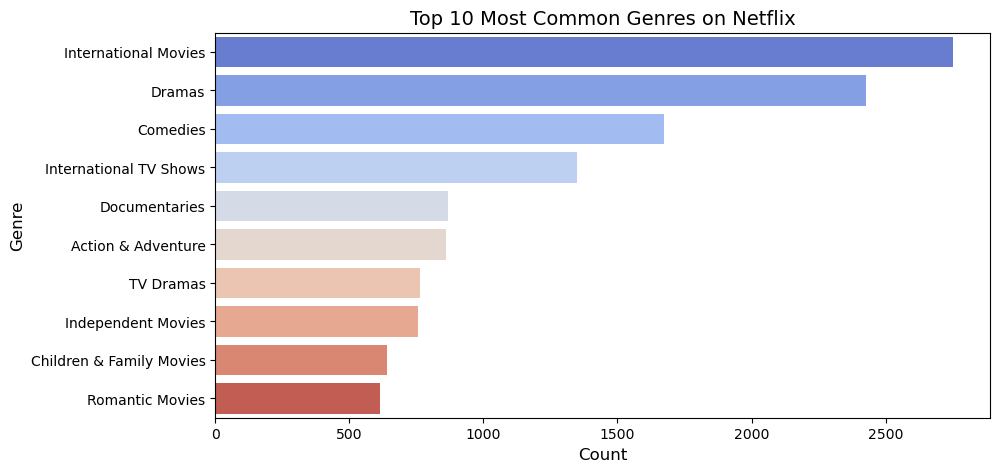

In [49]:
from collections import Counter

# Splitting multiple genres and counting them
genre_list = []
for genres in df["listed_in"]:
    genre_list.extend(genres.split(", "))

# Count most common genres
genre_counts = Counter(genre_list)
common_genres = genre_counts.most_common(10)

# Convert to DataFrame
genre_df = pd.DataFrame(common_genres, columns=["Genre", "Count"])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_df["Count"], y=genre_df["Genre"], palette="coolwarm")
plt.title("Top 10 Most Common Genres on Netflix", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.show()


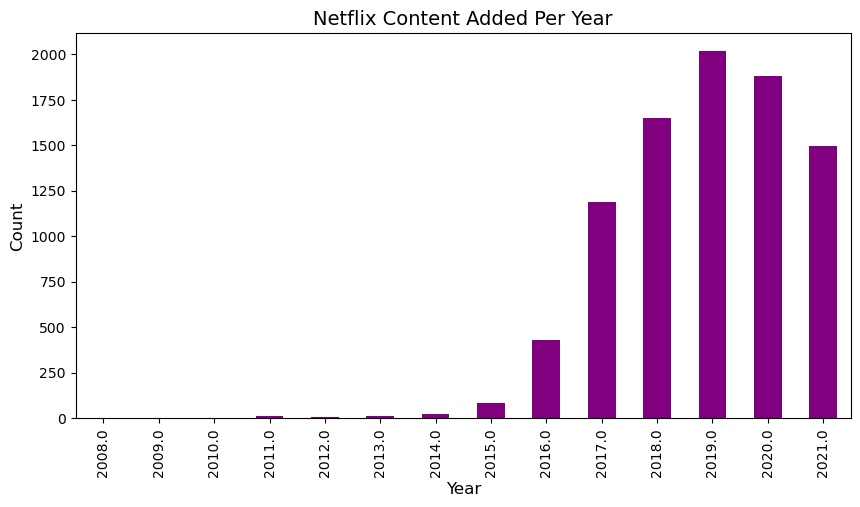

In [55]:
#e) Content Added Per Year

# Extract the year from 'date_added'
df["year_added"] = df["date_added"].apply(lambda x: x.split(", ")[-1] if x != "Unknown" else np.nan)
df["year_added"] = pd.to_numeric(df["year_added"], errors="coerce")

plt.figure(figsize=(10, 5))
df["year_added"].value_counts().sort_index().plot(kind="bar", color="purple")
plt.title("Netflix Content Added Per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

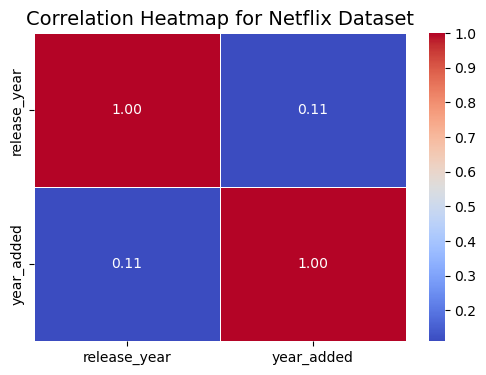

In [61]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical columns
numeric_df = df[["release_year", "year_added"]].dropna()

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Netflix Dataset", fontsize=14)
plt.show()


5 Key Insights from Netflix Dataset Analysis

1️⃣ Netflix has more Movies than TV Shows

    The count plot shows that Movies dominate Netflix's content library, with a significantly higher number of movies compared to TV Shows.

2️⃣ Top Countries Producing Netflix Content

    The United States, India, and the United Kingdom are the top three countries producing Netflix content. India is particularly strong in TV Shows and Bollywood movies.

3️⃣ Netflix Content Growth Over the Years

    The histogram of release years shows a sharp increase in content production after 2010, with a peak around 2018-2020, indicating Netflix's rapid expansion and investment in original content.

4️⃣ Most Popular Genres on Netflix

    The top genres include Dramas, Comedies, Documentaries, and International TV Shows. This suggests Netflix's global strategy of catering to diverse audiences with varied content preferences.

5️⃣ Recent Content Addition Trends

    The bar chart of content added per year shows that Netflix significantly increased content acquisition and production post-2015. The majority of titles were added between 2017-2021, reflecting Netflix’s aggressive push for fresh content.